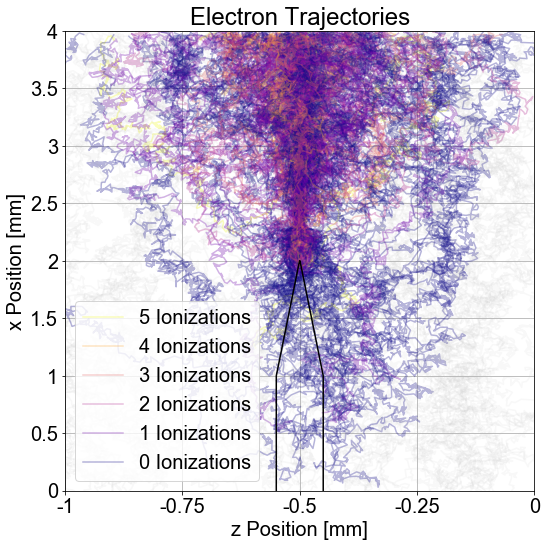

In [3]:
import glob
import re
from math import sqrt
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

from utils import Graph

def mil_hit_check(x, y, z):
    r = sqrt(y**2 + z**2)
    h = x
    
    if (r**2 + (h - 3500)**2 <= 1) or (h <= ((-500) / (99) * (r - 1) + 3500) and r <= 100):
        return True
    
    return False

file_tree = {}

for file in glob.glob('trajectories/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    ionization_list = [k[-1] for k in group.ionized]
    max_ionized = np.max([k[-1] for k in group.ionized])

    plt.rcParams['font.size'] = 20
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    fig = plt.figure(figsize=(8, 8))
    
    hits = 0

    for i in range(group.n):
        x, y, z = group.x[i], group.y[i], group.z[i]
        if mil_hit_check(x[-1], y[-1], z[-1]) is True:
            hits += 1
            plt.plot(z, x, color=plt.cm.jet(ionization_list[i] / max_ionized), alpha=0.3, label=int(ionization_list[i]))
        else:
            plt.plot(z, x, color='#BBBBBB', alpha=0.1)
        
    plt.plot([-100, -100, -1, -0.5, 0, 0.5, 1, 100, 100], [0, 3000, 3500, 3500.866025404, 3501, 3500.866025404, 3500, 3000, 0], color='0.0')

    plt.xlabel('z Position [mm]')
    plt.ylabel('x Position [mm]')
    
    plt.gca().set_xticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    plt.gca().set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
    
    attraction = hits / group.n
    plt.title(f'Electron Trajectories')

    plt.xlim(-1000, 1000)
    plt.ylim(2500, 4500)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip([int(j) for j in labels], handles))
    sorted_legend = dict(sorted(by_label.items(), reverse=True))
    L = plt.legend(sorted_legend.values(), sorted_legend.keys())
    
    L.get_texts()[0].set_text('5 Ionizations')
    L.get_texts()[1].set_text('4 Ionizations')
    L.get_texts()[2].set_text('3 Ionizations')
    L.get_texts()[3].set_text('2 Ionizations')
    L.get_texts()[4].set_text('1 Ionizations')
    L.get_texts()[5].set_text('0 Ionizations')
    
    plt.grid()
    plt.tight_layout()
    # plt.show()
    
    plt.savefig('gar_tip_electron_paths.pdf', bbox_inches='tight')